In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
df = pd.read_csv('termistori.csv', sep=";")
df = df.astype({'T': 'float'})
df = df.astype({'R': 'float'})
df

,T,R
0,-50.0,367700.0
1,-40.0,204700.0
2,-30.0,118500.0
3,-20.0,71020.0
4,-10.0,43670.0
5,0.0,27700.0
6,10.0,18070.0
7,20.0,12110.0
8,25.0,10000.0
9,30.0,8301.0


In [55]:
df["voltage"] = 3 * df["R"] / (22000 + df["R"])
df

,T,R,voltage
0,-50.0,367700.0,2.830639
1,-40.0,204700.0,2.708866
2,-30.0,118500.0,2.530249
3,-20.0,71020.0,2.290475
4,-10.0,43670.0,1.994975
5,0.0,27700.0,1.672032
6,10.0,18070.0,1.352882
7,20.0,12110.0,1.065084
8,25.0,10000.0,0.937500
9,30.0,8301.0,0.821854


In [56]:
df = df[df['T'] >= 0]
df

,T,R,voltage
5,0.0,27700.0,1.672032
6,10.0,18070.0,1.352882
7,20.0,12110.0,1.065084
8,25.0,10000.0,0.937500
9,30.0,8301.0,0.821854
10,40.0,5811.0,0.626838
11,50.0,4147.0,0.475810
12,60.0,3011.0,0.361161
13,70.0,2224.0,0.275429
14,80.0,1668.0,0.211425


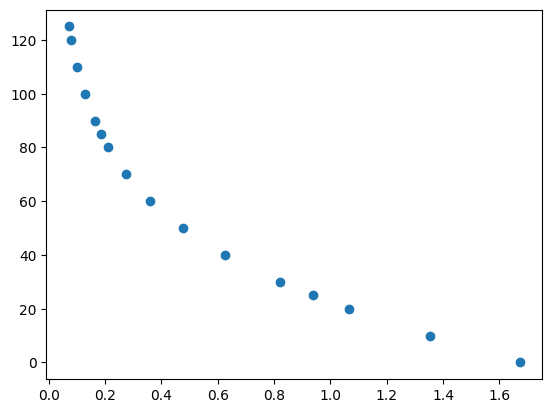

In [57]:
plt.scatter(df["voltage"], df["T"])

In [58]:
fit = np.polyfit(df["voltage"], df["T"], 2)
fit

array([  56.35282916, -161.45340005,  120.30477696])

In [59]:
df["fit"] = fit[0] * pow(df["voltage"], 2) + fit[1] * pow(df["voltage"], 1) + fit[2]
df

C:\Users\lucab\AppData\Local\Temp\ipykernel_8968\3583567698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fit"] = fit[0] * pow(df["voltage"], 2) + fit[1] * pow(df["voltage"], 1) + fit[2]


,T,R,voltage,fit
5,0.0,27700.0,1.672032,7.894629
6,10.0,18070.0,1.352882,5.019377
7,20.0,12110.0,1.065084,12.270233
8,25.0,10000.0,0.937500,18.471068
9,30.0,8301.0,0.821854,25.676830
10,40.0,5811.0,0.626838,41.242108
11,50.0,4147.0,0.475810,56.241659
12,60.0,3011.0,0.361161,69.344604
13,70.0,2224.0,0.275429,80.110775
14,80.0,1668.0,0.211425,88.688533


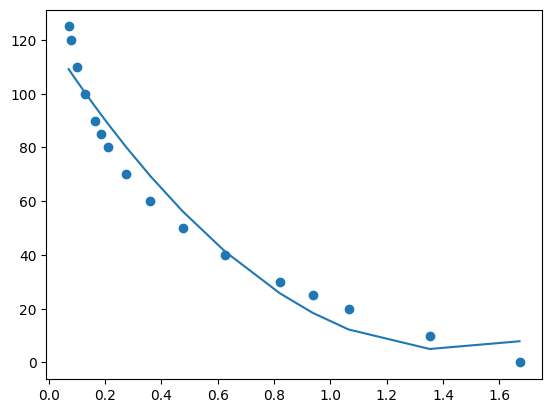

In [60]:
plt.scatter(df["voltage"], df["T"])
plt.plot(df["voltage"], fit[0] * pow(df["voltage"], 2) + fit[1] * pow(df["voltage"], 1) + fit[2])